# Places Rated

These data are taken from the Places Rated Almanac, published by Rand McNally. The nine rating criteria used by Places Rated Almanac are:
* Climate & Terrain: Higher scores are better; extreme temperatures, seasonal temperature variation, heating& cooling degree days, freezing days, zero-degree days, ninety-degree days. 
* Housing: Lower scores are better; utility bills, property taxes, mortgage payments.
* Health Care & Environment: Higher scores are better; per capita physicians, teaching hospitals, medical schools, cardiac rehabilitation centers, comprehensive cancer treatment centers, hospices, insurance/hospitalization costs index, flouridation of drinking water, air pollution.
* Crime: Lower scores are better; violent crime rate, property crime rate.
* Transportation: Higher scores are better; daily commute, public transportation, Interstate highways, air service, passenger rail service.
* Education: Higher scores are better; pupil/teacher ratio in the public K-12 system, effort index in K-12, accademic options in higher education.
* The Arts: Higher scores are better; museums, fine arts and public radio stations, public television stations, universities offering a degree or degrees in the arts, symphony orchestras, theatres, opera companies, dance companies, public libraries.
* Recreation: Higher scores are better; good restaurants, public golf courses, certified lanes for tenpin bowling, movie theatres, zoos, aquariums, family theme parks, sanctioned automobile race tracks, pari-mutuel betting attractions, major- and minor- league professional sports teams, NCAA Division I football and basketball teams, miles of ocean or Great Lakes coastline, inland water, national forests, national parks, or national wildlife refuges, Consolidated Metropolitan Statistical Area access.
* Economics: Higher scores are better; average household income adjusted for taxes and living costs, income growth, job growth.


In [ ]:
# Configure environment
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Other
import warnings
warnings.filterwarnings('ignore')

In [2]:
# read in data about places
places = pd.read_csv("Places.csv")

In [3]:
places.head()

,City,Climate,Housing,HlthCare,Crime,Transp,Educ,Arts,Recreat,Econ,Long,Lat,Pop
0,AbileneTX,521,6200,237,923,4031,2757,996,1405,7633,-99.6890,32.5590,110932
1,AkronOH,575,8138,1656,886,4883,2438,5564,2632,4350,-81.5180,41.0850,660328
2,AlbanyGA,468,7339,618,970,2531,2560,237,859,5250,-84.1580,31.5750,112402
3,Albany-Schenectady-TroyNY,476,7908,1431,610,6883,3399,4655,1617,5864,-73.7983,42.7327,835880
4,AlbuquerqueNM,659,8393,1853,1483,6558,3026,4496,2612,5727,-106.6500,35.0830,419700


In [45]:
# split the data - retain numeric variables
num_places = places.iloc[:, 1:10:]
#num_places

In [88]:
# scale the variables
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
  
scale_places = sc.fit_transform(num_places)

In [89]:
# detect outliers using PCA
from pca import pca

model = pca(alpha=0.05, detect_outliers=['ht2', 'spe'])

# Fit transform
results = model.fit_transform(scale_places)

[pca] >Column labels are auto-completed.
[pca] >Row labels are auto-completed.
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [9] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [7] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [9] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[7]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


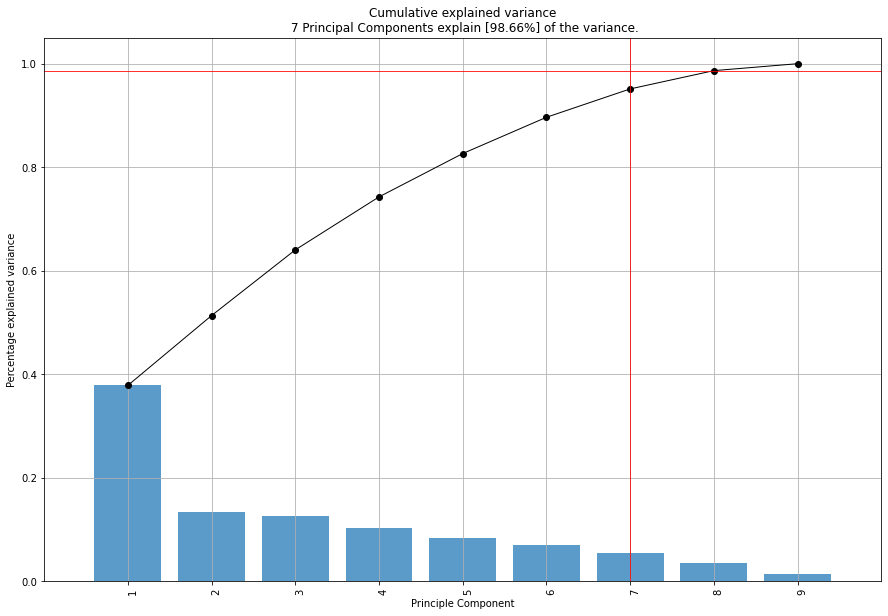

(<Figure size 1080x720 with 1 Axes>,
 <AxesSubplot:title={'center':'Cumulative explained variance\n 7 Principal Components explain [98.66%] of the variance.'}, xlabel='Principle Component', ylabel='Percentage explained variance'>)

<Figure size 432x288 with 0 Axes>

In [82]:
# create a scree plot to show variance explained per principal component
model.plot()

(<Figure size 1440x1080 with 1 Axes>,
 <AxesSubplot:title={'center':'7 Principal Components explain [98.66%] of the variance'}, xlabel='PC1 (37.8% expl.var)', ylabel='PC2 (13.4% expl.var)'>)

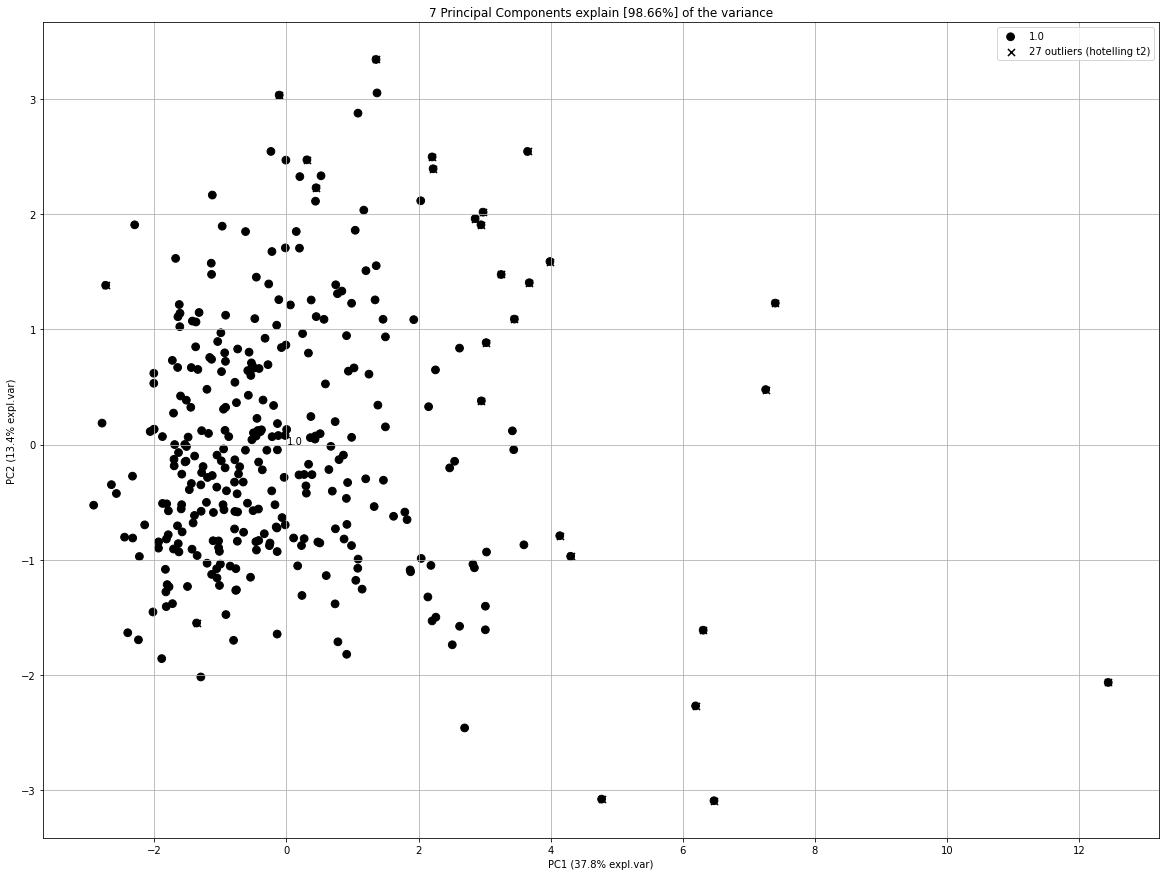

In [84]:
# create scatter plot, including outlier detection
model.scatter(hotellingt2=True)

[pca] >Plot PC1 vs PC2 with loadings.


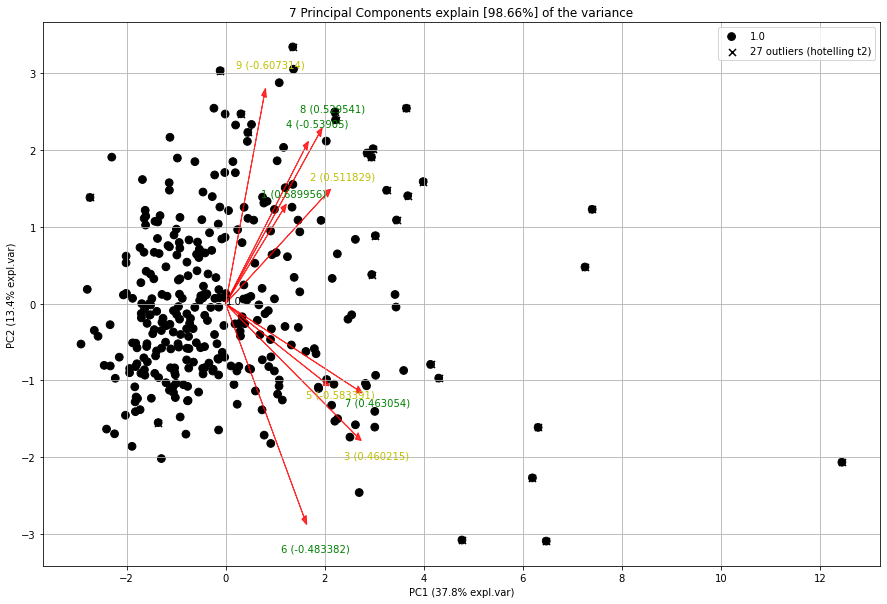

(<Figure size 1080x720 with 1 Axes>,
 <AxesSubplot:title={'center':'7 Principal Components explain [98.66%] of the variance'}, xlabel='PC1 (37.8% expl.var)', ylabel='PC2 (13.4% expl.var)'>)

In [85]:
# create a bipolot, including outlier detection
model.biplot(legend=True, SPE=True, hotellingt2=True)
#model.biplot3d(legend=True, SPE=True, hotellingt2=True)

In [74]:
# Select the outliers
outliers = center_places[results['outliers']['y_bool'],:]
outliers

array([[ 2.87062262e+00,  3.23325834e+00,  8.38024008e-01,
         6.15384540e-02, -1.76733605e-01,  8.77677752e-02,
         5.35274221e-01,  1.62403424e+00,  6.41506262e-01],
       [-2.84960737e+00,  1.60748435e+00, -5.83876475e-01,
         7.34540716e-01,  6.07960581e-01, -1.25158043e+00,
        -1.73645251e-01,  1.43064408e+00,  1.97875636e+00],
       [ 2.34342711e-01,  3.36508651e-01,  2.37275789e+00,
         2.15625799e+00,  2.20495473e+00,  2.04839872e+00,
         1.43188692e+00,  1.33766804e+00, -2.06541802e-02],
       [ 6.98593261e-01,  1.36983246e+00,  4.10919394e+00,
         7.12107307e-01,  1.78810751e+00,  2.07337491e+00,
         3.85981745e+00,  1.51246299e+00,  7.73568944e-01],
       [-2.05037273e-01,  1.07759623e+00,  4.57350835e+00,
         2.04551435e-01,  2.43753339e+00,  2.09522907e+00,
         4.68048990e+00,  1.25213008e+00, -2.95861728e-01],
       [-3.59572433e+00, -1.88340909e-01, -7.66254600e-02,
        -1.57049203e+00,  9.50272205e-01, -2.931191

### Principal Component Analysis

An unsupervised learning procedure that allows you to capture large amounts of variation within a smaller set of variables that is more easily analyzed and visualized.  A PCA allows analysis of data that contains multicollinearity, missing values, categorical data, or imprecise measurements.

The overall goal of a PCA is to reduce the number of dimensions of a dataset while still capturing as much of the information as possible.

**Standardization:**
Prior to performing a PCA, the variables should be standardized so the variances contribute equally.  Otherwise, variables with larger ranges will tend to dominate those with smaller ranges.

**The Covariance Matrix:** Once we have our standarized matrix, we can compute a covariance matrix.  This matrix is a *p x p* symmetric matrix where the entries are the covariances associated with all possible pairs of the initial variances.  Since the covariance of a variable with itself is its variance, in the main diagonal, we will have a symmetric matrix with equal portions above and below the diagonal.

Once we have the covariance metrix, we can determine the principal components.

**Principal Components:** the principal components are new variables that are creates as linear combinations of the initial variables.  The components are created in a way that each component is uncorrelated with another, and information captured within each component decreases with successive components (this property is well-illustrated in a scree plot).

Principal components generally represent the directions of the data that explain the maximum amount of variance.  In general, prinipcal components provide the best angle to see and evaluate the data so that the differences between observations are more visible.

Principal components are constructed so the first principal component accounts for the largest possible variance in the data set.  The second principal component will be calculated the same way, with the added condition that it is perpendicular to the first principal component, continuing on until a total of *p* principal components have been calculated.

The actual calculation of the principal components relies on the eigenvectors and eigenvalues of the covariance matrix:
  * The eigenvectors of the covariance matrix are the directions of the axes where there is the most variance.
  * The eigenvalues are the coefficients attached to the eigenvectors, which give the amount of variance carried in each principal component.
    